In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
hourlyData = pd.read_csv("C:\\Users\\arun.bhardwaj\\Desktop\\MyOrdner\\DALab\\resultData.csv")

In [16]:
hourlyData = hourlyData.drop(hourlyData.columns[0], axis=1)

In [17]:
hourlyData.head()

,startday,starthour,from_station_id,num_trips,from_station_name,from_station_latitude,from_station_longitude,day,month,year,day_name,tripdate,season,seasons_name,IsHoliday,weather,humidity,temperature
0,2013-06-27,1,91,1,Clinton St & Washington Blvd,41.883380,-87.641170,3,6,2013,Thursday,27,1,Summer,0,Clear,0.86,66.22
1,2013-06-27,11,17,1,Wood St & Division St,41.903320,-87.672730,3,6,2013,Thursday,27,1,Summer,0,Partly Cloudy,0.66,76.28
2,2013-06-27,11,88,3,Racine Ave & Randolph St,41.884069,-87.656853,3,6,2013,Thursday,27,1,Summer,0,Partly Cloudy,0.66,76.28
3,2013-06-27,12,28,1,Larrabee St & Menomonee St,41.914680,-87.643320,3,6,2013,Thursday,27,1,Summer,0,Clear,0.58,78.49
4,2013-06-27,12,85,2,Michigan Ave & Oak St,41.900960,-87.623777,3,6,2013,Thursday,27,1,Summer,0,Clear,0.58,78.49


In [19]:
#converting datatype
hourlyData.startday =  pd.to_datetime(hourlyData.startday, errors="coerce")

categoricalVariables = ["from_station_id","from_station_name","month", "year", "season", "seasons_name", "IsHoliday",
                       "weather"]
for var in categoricalVariables:
    hourlyData[var] = hourlyData[var].astype("category")

hourlyData.dtypes

startday                  datetime64[ns]
starthour                          int64
from_station_id                 category
num_trips                          int64
from_station_name               category
from_station_latitude            float64
from_station_longitude           float64
day                                int64
month                           category
year                            category
day_name                          object
tripdate                           int64
season                          category
seasons_name                    category
IsHoliday                       category
weather                         category
humidity                         float64
temperature                      float64
dtype: object

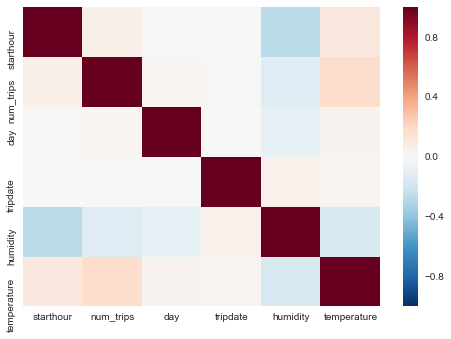

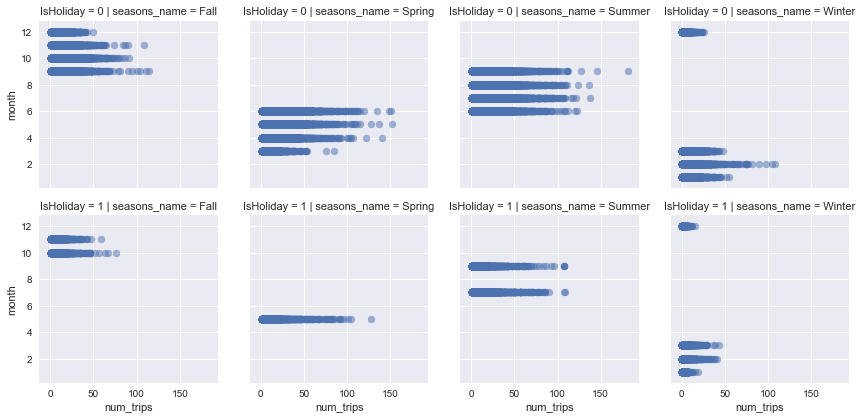

In [21]:
import seaborn as sns

X = hourlyData.drop(['startday',  'from_station_longitude', 'from_station_name', 'seasons_name', 'from_station_latitude'], axis=1)

sns.heatmap(X.corr())

grid = sns.FacetGrid(hourlyData, col = 'seasons_name', row = 'IsHoliday')
grid.map(plt.scatter, 'num_trips', 'month', alpha = 0.5)
grid.add_legend();


In [22]:
X.corr()

,starthour,num_trips,day,tripdate,humidity,temperature
starthour,1.000000,0.057701,0.003357,-0.003104,-0.265934,0.106438
num_trips,0.057701,1.000000,0.021315,0.000930,-0.118563,0.185459
day,0.003357,0.021315,1.000000,-0.003349,-0.079831,0.035702
tripdate,-0.003104,0.000930,-0.003349,1.000000,0.049811,0.018414
humidity,-0.265934,-0.118563,-0.079831,0.049811,1.000000,-0.165816
temperature,0.106438,0.185459,0.035702,0.018414,-0.165816,1.000000
